Copyright (c) Meta Platforms, Inc. and its affiliates.  
  
This source code is licensed under the MIT license found in the LICENSE file in the root directory of this source tree.

## **Index:**
- Please ensure R is installed on your machine and packages for Robyn have been installed
- [Import necessary python packages](#import-python-packages)
- Environment Setup:
    - [Setting up environment on WINDOWS machine](#Setting-up-environment-on-WINDOWS-machine)
    - [Setting up environment on LINUX machine](#Setting-up-environment-on-LINUX-machine)
    - [Setting up environment on MAC](#Setting-up-environment-on-MAC)
- Demo Script
    - Provision API
    - Get Data
    - Robyn Inputs
    - Robyn Run
    - Robyn Outputs

## Overview of the Notebook

This notebook serves as a guide to interact with the Robyn API using Python. It takes inspiration from the demo file provided by Robyn and maintains a similar structure.

## Prerequisites

To successfully execute this notebook, the following setup is required:

- R must be installed on your system.
- The following R libraries should be installed: `arrow`, `dplyr`, `ggplot2`, `jsonlite`, `plumber`, and `tibble`.
- `Robyn` library must be installed from the `robyn_api` branch on GitHub with the command:
  ```R
  remotes::install_github("facebookexperimental/Robyn/R", ref = "robyn-api", force = TRUE)
  ```
- `Nevergrad` optimization library should also be installed.  
Guide: https://github.com/facebookexperimental/Robyn/blob/main/demo/install_nevergrad.R
   

Please note that this notebook is intended to be run in the same directory where `api_call.R` and `robyn-api.R` are located.

## Passing Arguments to Robyn API Functions

The Robyn API accepts arguments in the following categories:

1. **Data Frames**: These are the input datasets like training data, holiday data, and calibration data.
2. **Robyn Array Objects**: Objects such as `InputCollect`, `OutputModels`, and `OutputCollects` created within Robyn.
3. **Simple Strings or Arrays**: These include arguments like `dep_var`, `select_model`, `adstock`, `paid_media_vars`, etc.

### Steps to Invoke the API:

1. Initialize the arguments from category 3 within a dictionary object named `xxxArgs`.
2. Prepare the payload by defining the data from categories 1, 2, and 3.
3. Use the `requests` library in Python to make the API call with the payload.

#### Import necessary python packages <a class="anchor" id="import-python-packages"></a>

In [1]:
import pandas as pd
import json
import requests
import json
import binascii
import io
import pandas as pd
import os
import sys
import subprocess
from urllib.request import urlopen
from bs4 import BeautifulSoup
from PIL import Image
from IPython.display import display

#### Setting up environment on WINDOWS machine <a class="anchor" id="Setting-up-environment-on-WINDOWS-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! START "" /B "<path_where_R_is_installed>\Rscript.exe" "<path_where_robyn_api_files_exist>\api_call.R" </font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    e.g. ! START "" /B "C:\Program Files\R\R-4.2.2\bin\Rscript.exe" "C:\Documents\GitHub\robyn\robyn_api\api_call.R"

In [49]:
! START "" /B "C:/Program Files/R/R-4.2.2/bin/Rscript.exe" "C:/Users/ebyjose/OneDrive - Facebook/Documents/GitHub/robyn/robyn_api/api_call.R" 1>C:/Users/ebyjose/Robynlog.txt 2>&1

In [50]:
#to find the endpoint running plumber
! netstat -aon | find /i "listening" |find "9999"

  TCP    127.0.0.1:9999         0.0.0.0:0              LISTENING       11220


In [25]:
# RscriptPath = "C:/Program Files/R/R-4.2.2/bin/Rscript.exe"
# apiFilePath = "C:/Users/ebyjose/OneDrive - Facebook/Documents/GitHub/robyn/robyn_api/api_call.R"
# logFilePath = "C:/Users/ebyjose/Robynlog.txt"

# # currPath = os.getcwd()
# # currPath = currPath.replace('\\','/')
# # logFilePath ='"'+ "1> "+ '"' + currPath+"/log.txt"+ '"' +" 2>&1" + '"'

# # p = subprocess.Popen([RscriptPath, apiFilePath, "1> C:/log.txt 2>&1"])
# p = subprocess.call(["START", "/B", RscriptPath, apiFilePath, "1>", logFilePath , "2>&1" ])

In [52]:
# to close the API in windows
endpoint = 11220
subprocess.call(['taskkill', '/F', '/T', '/PID',  str(endpoint)])

0

In [44]:
requests.post(apiBaseUrl.format('exit'),data=payload)

<Response [500]>

#### Steps to run RobynAPI if you are using a <u> LINUX </u> machine/server <a class="anchor" id="Setting-up-environment-on-LINUX-machine"></a>

#### Barebones command to run RobynAPI -> <font color='red'> ! Rscript <path_where_robyn_api_files_exist>\api_call.R &</font>
1. Find location where R is installed on your machine. If the location is "C:\Program Files\R\R-4.2.2\bin\" Then use this to replace <path_where_R_is_installed>
2. Find where api files exist and replace it with <path_where_robyn_api_files_exist>
    
    e.g. # ! Rscript /home/robyn/robyn_api/api-call.R

In [ ]:
! Rscript <path_to_apifile>/api_call.R &

#### Steps to run RobynAPI if you are using a <u> MAC </u> <a class="anchor" id="Setting-up-environment-on-MAC"></a>

#### Barebones command to run RobynAPI -> <font color='red'> subprocess.Popen(["Rscript", "<path_to_apifile>/api_call.R"])</font>
1. Find where api files exist and replace it with <path_to_apifile>
    
    e.g. # subprocess.Popen(["Rscript", "/home/robyn/robyn_api/api_call.R"])

In [8]:
p = subprocess.Popen(["Rscript", "./api_call.R"])

Running plumber API at http://127.0.0.1:9999
Running swagger Docs at http://127.0.0.1:9999/__docs__/


In [7]:
# p.kill()

# Demo file

In [9]:
apiBaseUrl = "http://127.0.0.1:9999/{}"

In [10]:
url = apiBaseUrl[:-3]+"/openapi.json"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")
apis = json.loads(soup.contents[0])
for i in apis['paths'].keys():
    print(apiBaseUrl.format(i[1:]))

http://127.0.0.1:9999/robyn_version
http://127.0.0.1:9999/dt_simulated_weekly
http://127.0.0.1:9999/dt_prophet_holidays
http://127.0.0.1:9999/robyn_inputs
http://127.0.0.1:9999/robyn_run
http://127.0.0.1:9999/robyn_outputs
http://127.0.0.1:9999/robyn_onepagers
http://127.0.0.1:9999/robyn_allocator
http://127.0.0.1:9999/robyn_write
http://127.0.0.1:9999/robyn_recreate
http://127.0.0.1:9999/hyper_names


## Step 0: Setup environment

In [11]:
# Define a lambda function to convert hexadecimal data to a PNG image file.
# This is a single-statement function that takes two arguments:
# 'fileName' which is the name of the file to save the image as,
# and 'hexData' which is the string of hexadecimal data to convert to an image.
hexToPng = lambda fileName, hexData: (
    Image.open(  # Open an image using the PIL library
        io.BytesIO(  # Create an in-memory binary stream
            binascii.unhexlify(hexData)  # Convert hexadecimal data back to binary
        )
    ).save(fileName, "png")  # Save the opened image as a PNG file with the given fileName
)

In [12]:
def asSerialisedFeather(modelData):
    """
    Serializes given model data to a Feather-formatted hex string.

    This function takes model data, converts it to a pandas DataFrame,
    serializes the DataFrame into the Feather binary format for efficient
    storage and retrieval, and then encodes this binary data into a hexadecimal
    string for easy transmission or storage in text-based formats.

    Args:
    modelData: The data to serialize. Can be any structure that pandas can
               convert to a DataFrame (like a dict of lists or list of dicts).

    Returns:
    A hexadecimal string representation of the Feather-formatted data.
    """

    # Create an in-memory bytes buffer
    modelDataFeather = io.BytesIO()
    
    # Convert the input model data into a DataFrame and then to Feather format,
    # writing the binary data into our in-memory buffer
    pd.DataFrame(modelData).to_feather(modelDataFeather)
    
    # Move the buffer position to the start of the stream
    modelDataFeather.seek(0)
    
    # Read the binary Feather data from the buffer
    modelDataBinary = modelDataFeather.read()
    
    # Convert the binary data to a hexadecimal string and return it
    return binascii.hexlify(modelDataBinary).decode()

In [13]:
# Set displaying image size
max_size = (1000, 1500)

In [14]:
# Set to FALSE to avoid the creation of files locally
create_files = True

Check the version

In [15]:
response = requests.get(apiBaseUrl.format('robyn_version'))
respJson = json.loads(response.content.decode('utf-8'))
respJson

['3.10.5.9004']

## Step 1: Load data
Check simulated dataset or load your own dataset

In [16]:
response = requests.get(apiBaseUrl.format('dt_simulated_weekly'))
respJson = json.loads(response.content.decode('utf-8'))
dt_simulated_weekly = pd.DataFrame(respJson)
dt_simulated_weekly.head()

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,67075.04,0.0,38185.4667,7.290385e+07,0.0000,0,8125009,22821.3987,na,19401.6538
1,2015-11-30,2.584277e+06,85840.36,0.0,0.0000,1.658110e+07,29511.7155,12400,7901549,3425.8574,na,14791.0000
2,2015-12-07,2.547387e+06,0.00,396835.2,1361.6000,4.995477e+07,36132.3590,11360,8300197,12769.1261,na,14544.0000
3,2015-12-14,2.875220e+06,250350.92,0.0,53040.0000,3.164930e+07,36804.2110,12760,8122883,8401.4720,na,2800.0000
4,2015-12-21,2.215953e+06,0.00,832008.0,0.0000,8.802269e+06,28401.7441,10840,7105985,2068.7478,na,15478.0000


Check holidays from Prophet  
59 countries included. If your country is not included, please manually add it.  
Tipp: any events can be added into this table, school break, events etc.

In [17]:
response = requests.get(apiBaseUrl.format('dt_prophet_holidays'))
respJson = json.loads(response.content.decode('utf-8'))
dt_prophet_holidays = pd.DataFrame(respJson)
dt_prophet_holidays.head()

,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


Directory where you want to export results to (will create new folders)

In [18]:
robyn_directory = '~/Desktop'

## Step 2a: For first time user: Model specification in 4 steps
### 2a-1: First, specify input variables
All sign control are now automatically provided: "positive" for media & organic  
variables and "default" for all others. User can still customise signs if necessary.  
Documentation is available, access it anytime by running: ?robyn_inputs

In [19]:
# Define Args for robyn_inputs()
inputArgs = {
    "date_var": "DATE", # date format must be "2020-01-01"
    "dep_var": "revenue", # there should be only one dependent variable
    "dep_var_type": "revenue", # "revenue" (ROI) or "conversion" (CPA)
    "prophet_vars": ["trend", "season", "holiday"], # "trend","season", "weekday" & "holiday"
    "prophet_country": "DE", # input country code. Check: dt_prophet_holidays
    "context_vars" : ["competitor_sales_B", "events"], # e.g. competitors, discount, unemployment etc
    "paid_media_spends": ["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"], # mandatory input
    "paid_media_vars": ["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"], # mandatory.
    # paid_media_vars must have same order as paid_media_spends. Use media exposure metrics like
    # impressions, GRP etc. If not applicable, use spend instead.
    "organic_vars" : "newsletter", # marketing activity without media spend
#     "factor_vars" : ["events"], # force variables in context_vars or organic_vars to be categorical
    "window_start": "2016-01-01",
    "window_end": "2018-12-31",
    "adstock": "geometric" # geometric, weibull_cdf or weibull_pdf.
}

In [20]:
# Build the payload for the robyn_inputs()
payload = {
    'dt_input' : asSerialisedFeather(dt_simulated_weekly), 
    'dt_holiday' : asSerialisedFeather(dt_prophet_holidays), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [21]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

Automatically set these variables as 'factor_vars': 'events'
Input 'window_start' is adapted to the closest date contained in input data: 2016-01-04


## 2a-2: Second, define and add hyperparameters
Default media variable for modelling has changed from paid_media_vars to paid_media_spends.  
Also, calibration_input are required to be spend names.  
hyperparameter names are based on paid_media_spends names too. See right hyperparameter names:

In [22]:
# Build the payload for the hyper_names()
payload = {
    'adstock' : InputCollect['adstock'], 
    'all_media' : json.dumps(InputCollect['all_media'])
}

In [23]:
# Get response
response = requests.post(apiBaseUrl.format('hyper_names'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
hyper_names = respJson

In [24]:
hyper_names

['facebook_S_alphas',
 'facebook_S_gammas',
 'facebook_S_thetas',
 'newsletter_alphas',
 'newsletter_gammas',
 'newsletter_thetas',
 'ooh_S_alphas',
 'ooh_S_gammas',
 'ooh_S_thetas',
 'print_S_alphas',
 'print_S_gammas',
 'print_S_thetas',
 'search_S_alphas',
 'search_S_gammas',
 'search_S_thetas',
 'tv_S_alphas',
 'tv_S_gammas',
 'tv_S_thetas']

Example hyperparameters ranges for Geometric adstock

In [25]:
# Set Args for robyn_inputs()
inputArgs = {
    "hyperparameters" : {
        "facebook_S_alphas" : [0.5, 3],
        "facebook_S_gammas" : [0.3, 1],
        "facebook_S_thetas" : [0, 0.3],
        "print_S_alphas" : [0.5, 3],
        "print_S_gammas" : [0.3, 1],
        "print_S_thetas" : [0.1, 0.4],
        "tv_S_alphas" : [0.5, 3],
        "tv_S_gammas" : [0.3, 1],
        "tv_S_thetas" : [0.3, 0.8],
        "search_S_alphas" : [0.5, 3],
        "search_S_gammas" : [0.3, 1],
        "search_S_thetas" : [0, 0.3],
        "ooh_S_alphas" : [0.5, 3],
        "ooh_S_gammas" : [0.3, 1],
        "ooh_S_thetas" : [0.1, 0.4],
        "newsletter_alphas" : [0.5, 3],
        "newsletter_gammas" : [0.3, 1],
        "newsletter_thetas" : [0.1, 0.4],
        "train_size": [0.5, 0.8]
    }
}

## 2a-3: Third, add hyperparameters into robyn_inputs()

In [26]:
# Build the payload for the hyper_names()
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonInputArgs' : json.dumps(inputArgs)
}

In [27]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
InputCollect = respJson

>> Running feature engineering...


## 2a-4: Fourth (optional), model calibration / add experimental input
### Guide for calibration

1. Calibration channels need to be paid_media_spends or organic_vars names.
2. We strongly recommend to use Weibull PDF adstock for more degree of freedom when calibrating Robyn.
3. We strongly recommend to use experimental and causal results that are considered ground truth to calibrate MMM. Usual experiment types are identity-based (e.g. Facebook conversion lift) or geo-based (e.g. Facebook GeoLift). Due to the nature of treatment and control groups in an experiment, the result is considered immediate effect. It's rather impossible to hold off historical carryover effect in an experiment. Therefore, only calibrates the immediate and the future carryover effect. When calibrating with causal experiments, use calibration_scope = "immediate".
4. It's controversial to use attribution/MTA contribution to calibrate MMM. Attribution is considered biased towards lower-funnel channels and strongly impacted by signal quality. When calibrating with MTA, use calibration_scope = "immediate".
5. Every MMM is different. It's highly contextual if two MMMs are comparable or not. In case of using other MMM result to calibrate Robyn, use calibration_scope = "total".
6. Currently, Robyn only accepts point-estimate as calibration input. For example, if 10k\\$ spend is tested against a hold-out for channel A, then input the incremental return as point-estimate as the example below.
7. The point-estimate has to always match the spend in the variable. For example, if channel A usually has \\$100K weekly spend and the experimental holdout is 70%, input the point-estimate for the \\$30K, not the \\$70K.
8. If an experiment contains more than one media variable, input "channe_A+channel_B" to indicate combination of channels, case sensitive.

In [28]:
# calibration_input = {
#     # channel name must in paid_media_vars
#     "channel": ["facebook_S","tv_S","facebook_S+search_S","newsletter"],
#     # liftStartDate must be within input data range
#     "liftStartDate" : ["2018-05-01","2018-04-03","2018-07-01","2017-12-01"],
#     # liftEndDate must be within input data range
#     "liftEndDate" : ["2018-06-10","2018-06-03","2018-07-20","2017-12-31"],
#     # Provided value must be tested on same campaign level in model and same metric as dep_var_type
#     "liftAbs" : [400000, 300000, 700000, 200],
#     # Spend within experiment: should match within a 10% error your spend on date range for each channel from dt_input
#     "spend" : [421000, 7100, 350000, 0],
#     # Confidence: if frequentist experiment, you may use 1 - pvalue
#     "confidence" : [0.85, 0.8, 0.99, 0.95],
#     # KPI measured: must match your dep_var
#     "metric" : ["revenue","revenue","revenue","revenue"],
#     # Either "immediate" or "total". For experimental inputs like Facebook Lift, "immediate" is recommended.
#     "calibration_scope" : ["immediate","immediate","immediate","immediate"]
# }
# calibration_input = pd.DataFrame(calibration_input)
# calibration_input

In [29]:
# payload = {
#     'InputCollect' : json.dumps(InputCollect), 
#     'calibration_input' : asSerialisedFeather(calibration_input), 
# }

In [30]:
# # Get response
# response = requests.post(apiBaseUrl.format('robyn_inputs'),data=payload)
# respJson = json.loads(response.content.decode('utf-8'))
# InputCollect = respJson

### Check spend exposure fit if available

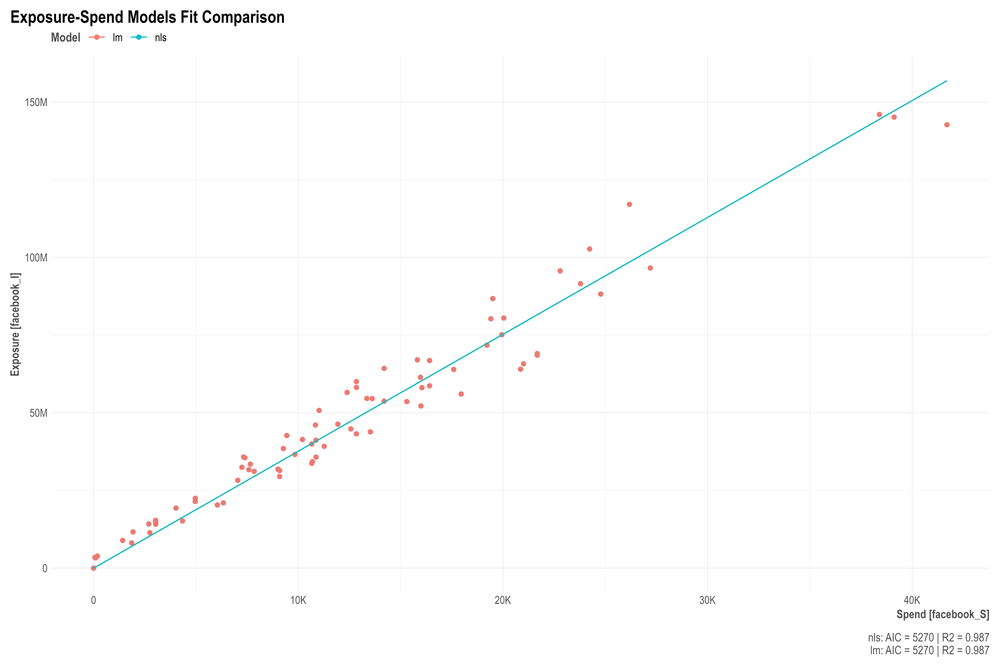

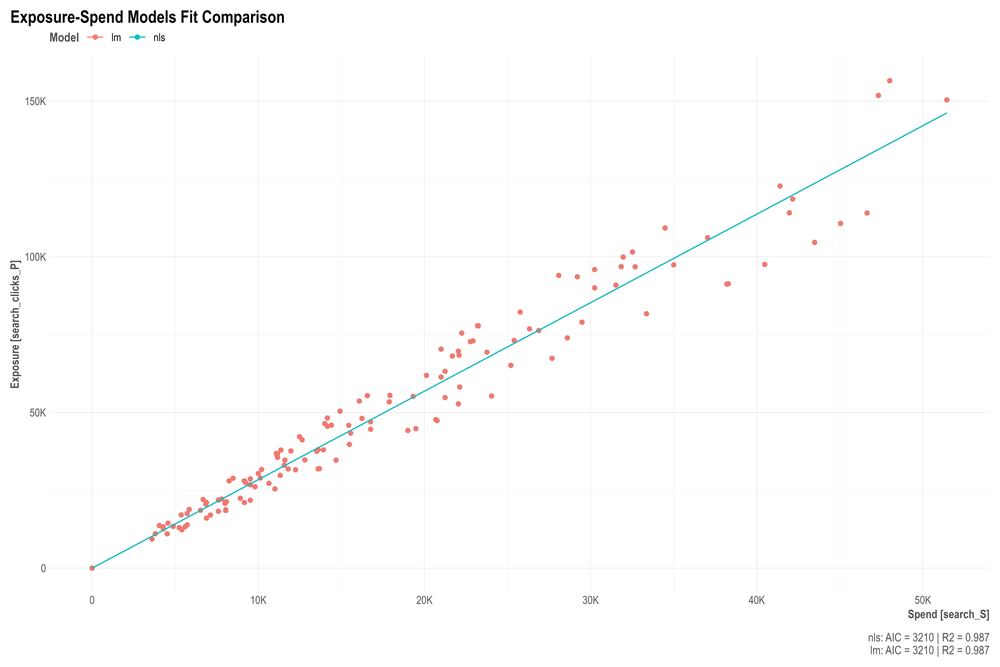

In [31]:
if len(InputCollect['exposure_vars']) > 0:
    for i in InputCollect['exposure_vars']:
        image_data = binascii.unhexlify("".join(InputCollect['modNLS']['plots'][i]))
        image = Image.open(io.BytesIO(image_data))
        image.thumbnail(max_size, Image.Resampling.LANCZOS)
        display(image)

## Step 3: Build initial model

In [32]:
runArgs = {
    "iterations" : 500, # NULL defaults to (max available - 1)
    "trials" : 1, # 5 recommended for the dummy dataset
    "ts_validation" : True,  # 3-way-split time series for NRMSE validation.
    "add_penalty_factor" : False, # Experimental feature. Use with caution.
}

In [33]:
# Build the payload for the robyn_run()
payload = {
    'InputCollect' : json.dumps(InputCollect), 
    'jsonRunArgs' : json.dumps(runArgs)
}

In [34]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_run'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputModels = respJson

Warning in check_iteration(InputCollect$calibration_input, iterations, trials,  :
  We recommend to run at least 2000 iterations per trial and 5 trials to build initial model
Input data has 208 weeks in total: 2015-11-23 to 2019-11-11
Initial model is built on rolling window of 157 week: 2016-01-04 to 2018-12-31
Time-series validation with train_size range of 50%-80% of the data...
Using geometric adstocking with 20 hyperparameters (20 to iterate + 0 fixed) on 9 cores
>>> Starting 1 trials with 500 iterations each using TwoPointsDE nevergrad algorithm...
  Running trial 1 of 1


  |===================================================================== |  99%
  Finished in 0.19 mins


- DECOMP.RSSD NOT converged: sd@qt.20 0.063 > 0.052 & |med@qt.20| 0.57 <= 0.63
- NRMSE NOT converged: sd@qt.20 0.078 > 0.065 & |med@qt.20| 0.21 > 0.14
Total run time: 0.23 mins
Picking joint bandwidth of 0.0292
Picking joint bandwidth of 0.0206


### Check MOO (multi-objective optimization) convergence plots

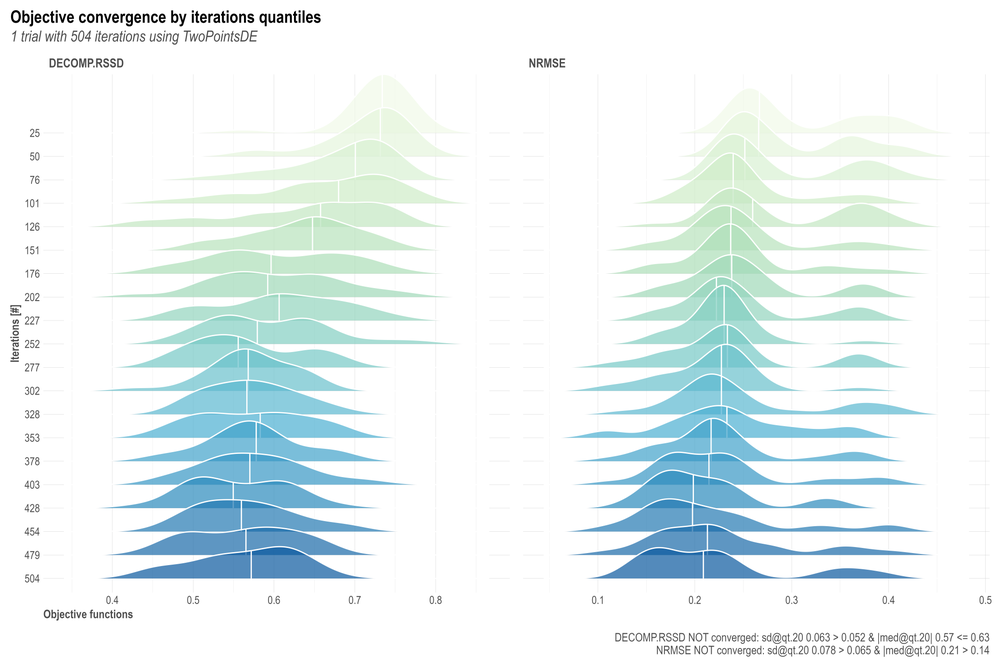

In [35]:
image_data = binascii.unhexlify("".join(OutputModels['convergence']['moo_distrb_plot']))
image = Image.open(io.BytesIO(image_data))
image.thumbnail(max_size, Image.Resampling.LANCZOS)
display(image)

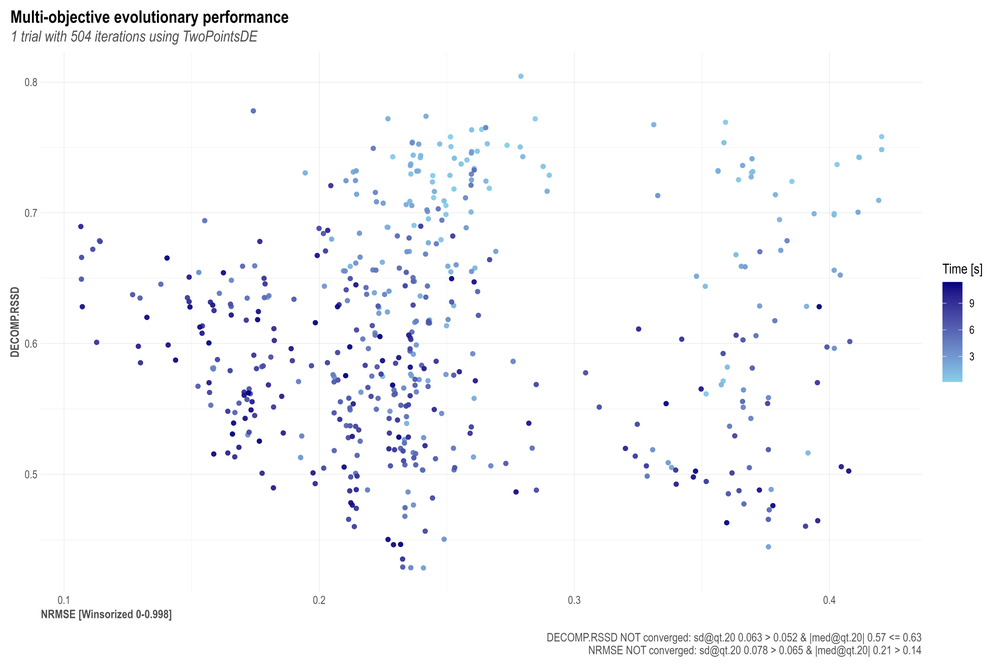

In [36]:
image_data = binascii.unhexlify("".join(OutputModels['convergence']['moo_cloud_plot']))
image = Image.open(io.BytesIO(image_data))
image.thumbnail(max_size, Image.Resampling.LANCZOS)
display(image)

### Check time-series validation plot (when ts_validation == TRUE)

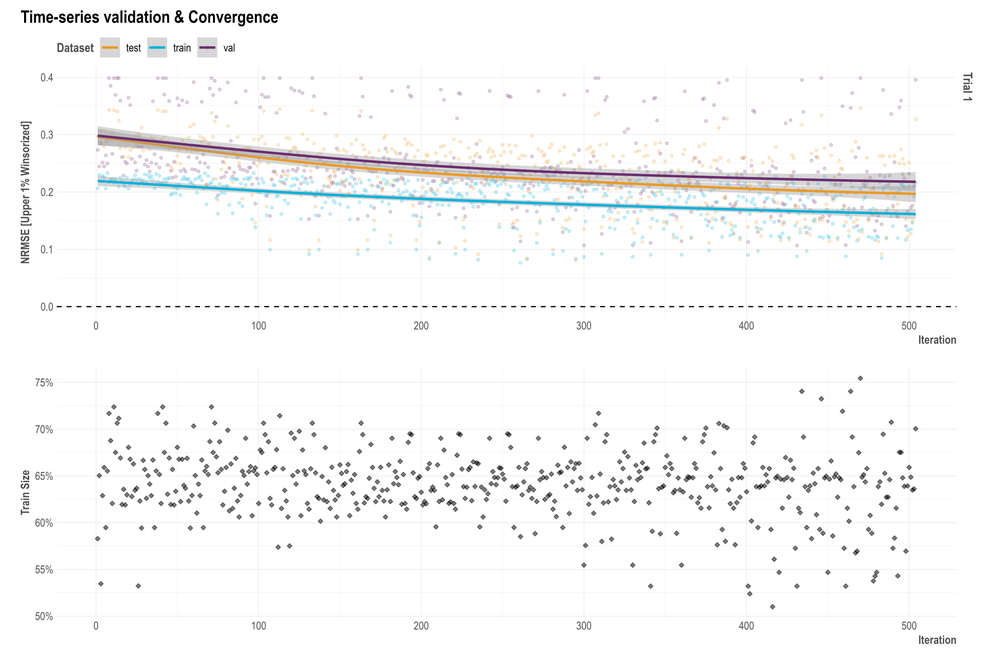

In [37]:
if OutputModels['ts_validation_plot']:
    image_data = binascii.unhexlify("".join(OutputModels['ts_validation_plot']))
    image = Image.open(io.BytesIO(image_data))
    image.thumbnail(max_size, Image.Resampling.LANCZOS)
    display(image)

## Calculate Pareto fronts, cluster and export results and plots.

In [38]:
outputsArgs = {
    "pareto_fronts" : 'auto', # automatically pick how many pareto-fronts to fill min_candidates (100)
#     "min_candidates" : 100, # top pareto models for clustering. Default to 100
#     "calibration_constraint" : 0.1, # range c(0.01, 0.1) & default at 0.1
    "csv_out" : "pareto", # "pareto", "all", or NULL (for none)
    "clusters" : True, # Set to TRUE to cluster similar models by ROAS. See ?robyn_clusters
    "export" : create_files, # this will create files locally
    "plot_folder" : robyn_directory, # path for plots exports and files creation
    "plot_pareto" : create_files # Set to FALSE to deactivate plotting and saving model one-pagers
}

In [39]:
# Build the payload for the robyn_outputs()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputModels' : json.dumps(OutputModels),
    'jsonOutputsArgs' : json.dumps(outputsArgs)
}

In [40]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_outputs'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
OutputCollect = respJson

>>> Running Pareto calculations for 500 models on auto fronts...
>> Automatically selected 6 Pareto-fronts to contain at least 100 pareto-optimal models (108)
>>> Calculating response curves for all models' media variables (540)...
>> Pareto-Front: 1 [21 models]


 00:00:01 [=========================================] 100% | 21                      


>> Pareto-Front: 2 [17 models]


 00:00:01 [=========================================] 100% | 17                      
 00:00:00 [==                                       ] 4.76% | 1                      

>> Pareto-Front: 3 [21 models]


 00:00:02 [=========================================] 100% | 21                      
 00:00:00 [===                                      ] 6.67% | 1                      

>> Pareto-Front: 4 [15 models]


 00:00:01 [=========================================] 100% | 15                      
 00:00:00 [===                                      ] 6.67% | 1                      

>> Pareto-Front: 5 [15 models]


 00:00:01 [=========================================] 100% | 15                      
 00:00:00 [===                                      ] 5.26% | 1                      

>> Pareto-Front: 6 [19 models]


 00:00:02 [=========================================] 100% | 19                      


Creating directory for outputs: /Users/yuyatanaka/Desktop/Robyn_202311072307_init/
>>> Calculating clusters for model selection using Pareto fronts...
>> Auto selected k = 5 (clusters) based on minimum WSS variance of 5%
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in rnorm(sim_n, mean = boot_mean, sd = boot_se) : NAs produced
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to 

  |======================================================================| 100%


>> Exported model models as /Users/yuyatanaka/Desktop/Robyn_202311072307_init/RobynModel-models.json
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TRUE) :
  no non-missing arguments to max; returning -Inf
Picking joint bandwidth of 0.0339
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TRUE) :
  no non-missing arguments to max; returning -Inf
Picking joint bandwidth of 0.0404
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TRUE) :
  no non-missing arguments to max; returning -Inf
Picking joint bandwidth of 0.0103
Picking joint bandwidth of NaN
Warning in min(data$x, na.rm = TRUE) :
  no non-missing arguments to min; returning Inf
Warning in max(data$x, na.rm = TRUE) :
  no non-missin

### 4 csv files are exported into the folder for further usage.
Check schema here: https://github.com/facebookexperimental/Robyn/blob/main/demo/schema.R  
pareto_hyperparameters.csv, hyperparameters per Pareto output model  
pareto_aggregated.csv, aggregated decomposition per independent variable of all Pareto output  
pareto_media_transform_matrix.csv, all media transformation vectors  
pareto_alldecomp_matrix.csv, all decomposition vectors of independent variables

## Step 4: Select and save the any model
### Compare all model one-pagers and select one that mostly reflects your business reality

In [41]:
for i in OutputCollect['clusters']['models']:
    print(i['solID'])

1_38_3
1_48_3
1_41_4
1_26_2
1_49_1


In [42]:
select_model = '1_38_3'

In [43]:
writeArgs = {
    "select_model" : select_model,
    "export" : create_files,
#     "dir" : "~/Desktop"
}

In [44]:
# Build the payload for the robyn_write()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    'OutputModels' : json.dumps(OutputModels),
    "jsonWriteArgs": json.dumps(writeArgs)
}

In [45]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_write'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))

>> Exported model 1_38_3 as /Users/yuyatanaka/Desktop/Robyn_202311072307_init/RobynModel-1_38_3.json


To plot any model's one-pager:

In [46]:
onepagersArgs = {
    "select_model" : select_model,
    "export" : False, # this will create files locally
}

In [47]:
# Build the payload for the robyn_onepagers()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonOnepagersArgs": json.dumps(onepagersArgs),
    'dpi' : 100,
    'width' : 15,
    'height' : 20
}

In [48]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_onepagers'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
onepager = respJson

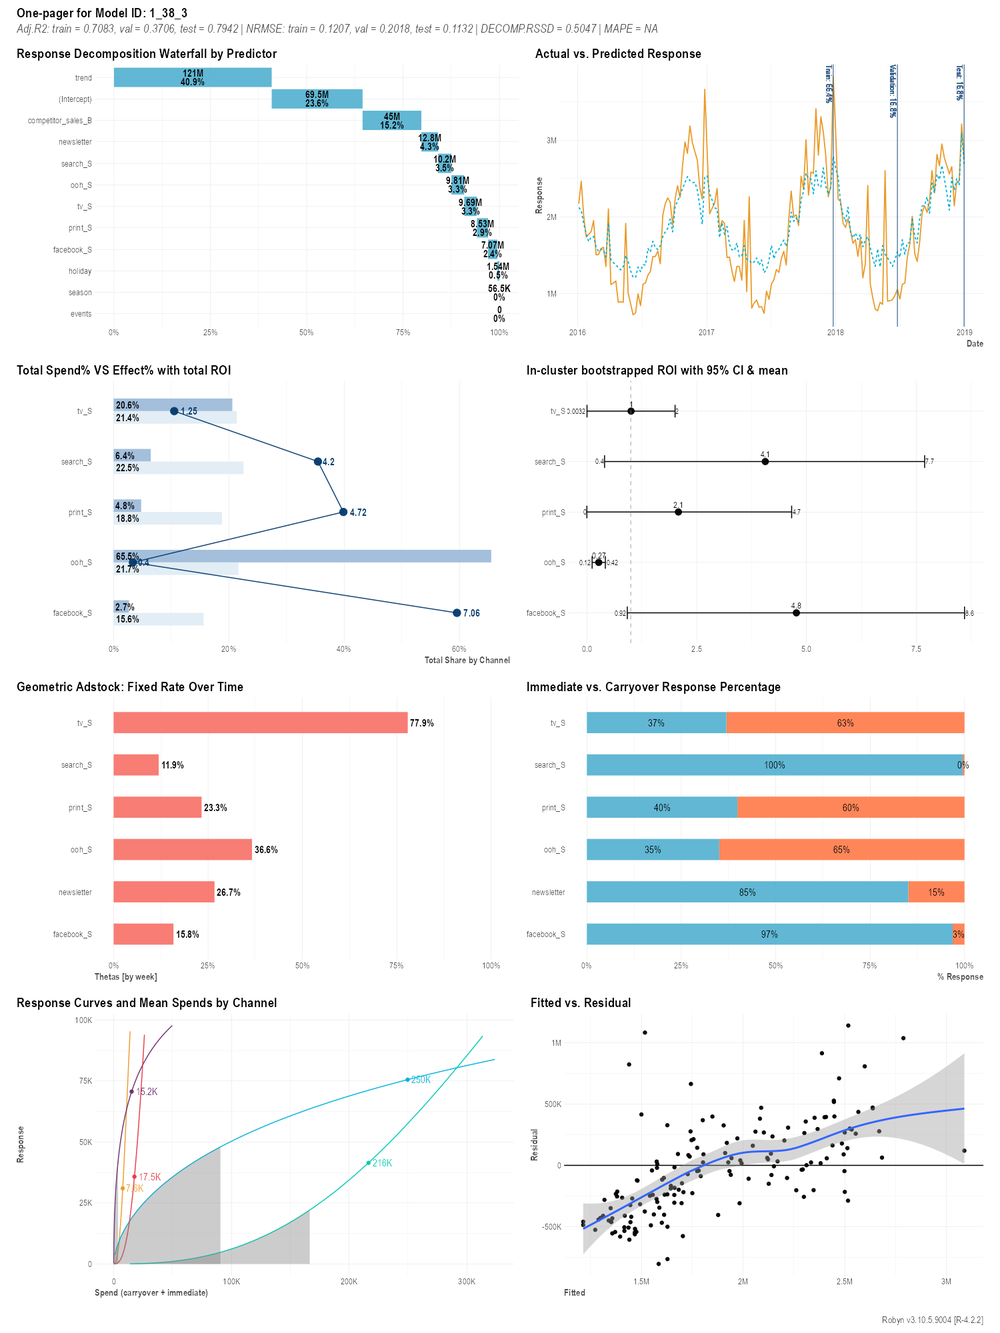

In [49]:
image_data = binascii.unhexlify("".join(onepager))
image = Image.open(io.BytesIO(image_data))
image.thumbnail(max_size, Image.Resampling.LANCZOS)
display(image)

## Step 5: Get budget allocation based on the selected model above
Budget allocation result requires further validation. Please use this recommendation with caution.  
Don't interpret budget allocation result if selected model above doesn't meet business expectation.

In [50]:
# NOTE: The order of constraints should follow:
InputCollect['paid_media_spends']

['tv_S', 'ooh_S', 'print_S', 'facebook_S', 'search_S']

Scenario "max_response": "What's the max. return given certain spend?"  
Example 1: max_response default setting: maximize response for latest month

In [51]:
allocatorArgs = {
    "select_model" : select_model,
#     "date_range" : None, # Default last month as initial period
#     "total_budget" : None, # When NULL, default is total spend in date_range
    "channel_constr_low" : 0.7,
    "channel_constr_up" : 1.2,
    "channel_constr_multiplier" : 3,
    "scenario" : "max_response"
}

In [52]:
# Build the payload for the robyn_allocator()
payload = {
    'InputCollect' : json.dumps(InputCollect),
    'OutputCollect' : json.dumps(OutputCollect),
    "jsonAllocatorArgs": json.dumps(allocatorArgs),
    'dpi' : 100,
    'width' : 15,
    'height' : 15
}

In [53]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_allocator'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
allocator = respJson

>>> Running budget allocator for model ID 1_38_3 ...
Automatically picked date_range = 'last_4'
Date Window: 2018-12-10:2018-12-31 (4 weeks)
Exporting to: /Users/yuyatanaka/Desktop/Robyn_202311072307_init/1_38_3_reallocated_best_roas.png


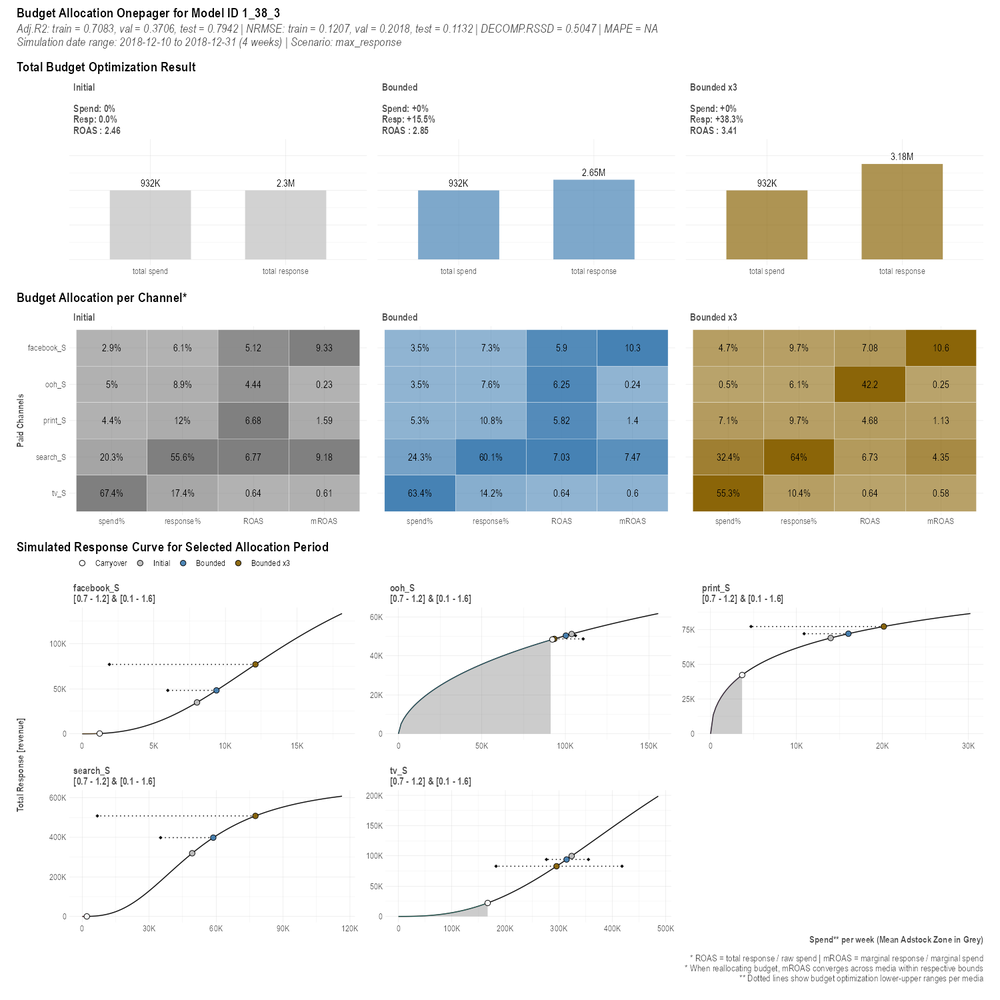

In [54]:
image_data = binascii.unhexlify("".join(allocator))
image = Image.open(io.BytesIO(image_data))
image.thumbnail(max_size, Image.Resampling.LANCZOS)
display(image)

## Optional: recreate old models and replicate results

In [55]:
recreateArgs = {
    "json_file" : "/Users/yuyatanaka/Desktop/Robyn_202311072307_init/RobynModel-1_38_3.json",
    "quiet" : False
}

In [56]:
# Build the payload for the robyn_recreate()
payload = {
    'dt_input' : asSerialisedFeather(dt_simulated_weekly), 
    'dt_holidays' : asSerialisedFeather(dt_prophet_holidays), 
    "jsonRecreateArgs": json.dumps(recreateArgs)
}

In [57]:
# Get response
response = requests.post(apiBaseUrl.format('robyn_recreate'),data=payload)
respJson = json.loads(response.content.decode('utf-8'))
RobynRecreated = respJson

>>> Recreating model 1_38_3
Imported JSON file successfully: /Users/yuyatanaka/Desktop/Robyn_202311072307_init/RobynModel-1_38_3.json
>> Running feature engineering...
Input data has 208 weeks in total: 2015-11-23 to 2019-11-11
Initial model is built on rolling window of 157 week: 2016-01-04 to 2018-12-31
>>> Calculating response curves for all models' media variables (5)...
Successfully recreated model ID: 1_38_3


In [58]:
InputCollectX = RobynRecreated['InputCollect']

In [59]:
OutputCollectX = RobynRecreated['OutputCollect']